In [1]:
# Lage plot for stasjon M

In [2]:
# Importerer moduler:

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import glob

In [3]:
# Leser inn data fra den første deploymenten som er en netcdf fil:
deployment1 = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment1/StationM_2021_hydrography.nc'
d1 = xr.open_dataset(deployment1)


In [4]:
# Prøver å sette sammen alle tekstfilene med data med glob funksjonen:
print(glob.glob("/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment*/*500m.txt"))

['/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_500m.txt', '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_500m.txt', '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_1500m.txt']


In [5]:
combined_df = pd.read_csv('/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_500m.txt', sep="\t")

In [10]:
d1.variables

Frozen({'LATITUDE': <xarray.IndexVariable 'LATITUDE' (LATITUDE: 1)>
array([65.829], dtype=float32)
Attributes:
    standard_name:        latitude
    long_name:            Latitude of each location
    units:                degrees_north
    valid_min:            -90.0
    valid_max:            90.0
    uncertainty:          
    comment:              
    axis:                 Y
    ancillary_variables:  POSITION_QC
    QC_indicator:         good data
    sdn_parameter_name:   Latitude north
    sdn_parameter_urn:    SDN:P01::ALATZZ01
    sdn_uom_name:         Degrees north
    sdn_uom_urn:          SDN:P06::DEGN, 'LONGITUDE': <xarray.IndexVariable 'LONGITUDE' (LONGITUDE: 1)>
array([2.203], dtype=float32)
Attributes:
    standard_name:        longitude
    long_name:            Longitude of each location
    units:                degrees_east
    valid_min:            -180.0
    valid_max:            180.0
    uncertainty:          
    comment:              
    axis:                

Prøver å sette sammen tekstfilene til ett datasett. Starter med å prøve å gjøre det for 500m dyp:

In [6]:
# Define the path to the directory containing the text files:
directory_path = "/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment*"

# Use glob to find all text files in the directory and concatenate them into a single DataFrame:
combined_df = pd.concat([pd.read_csv(f, sep="\t") for f in glob.glob(f"{directory_path}/*_500m.txt")], ignore_index=True)

# Optionally, add a 'Depth' column based on filename if needed
#combined_df['Depth'] = [f.split('/')[-1].split('.')[0] for f in glob.glob(f"{directory_path}/*.txt") for _ in range(len(pd.read_csv(f, sep="\t")))]

# Display the combined DataFrame
print(combined_df)

       T_raw_degC  T_raw_qf  T_degC  T_qf  C_raw_S/m  C_raw_qf    C_S/m  C_qf  \
0          0.0555         0  0.0555     1    2.92375         0  2.92375     1   
1          0.0408         0  0.0408     1    2.92252         0  2.92252     1   
2          0.0435         0  0.0435     1    2.92277         0  2.92277     1   
3          0.1154         0  0.1154     1    2.92886         0  2.92886     1   
4          0.0889         0  0.0889     1    2.92677         0  2.92677     1   
...           ...       ...     ...   ...        ...       ...      ...   ...   
11983      2.4692         0  2.4692     1    3.13330         0  3.13330     1   
11984      2.4041         0  2.4041     1    3.12699         0  3.12699     1   
11985      2.4250         0  2.4250     1    3.12877         0  3.12877     1   
11986      2.5274         0  2.5274     1    3.13802         0  3.13802     1   
11987      2.4761         0  2.4761     1    3.13351         0  3.13351     1   

       p_raw_dbar  p_raw_qf

/tmp/ipykernel_1003645/2816843467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.p_dbar[combined_df.p_qf>=3]=np.nan


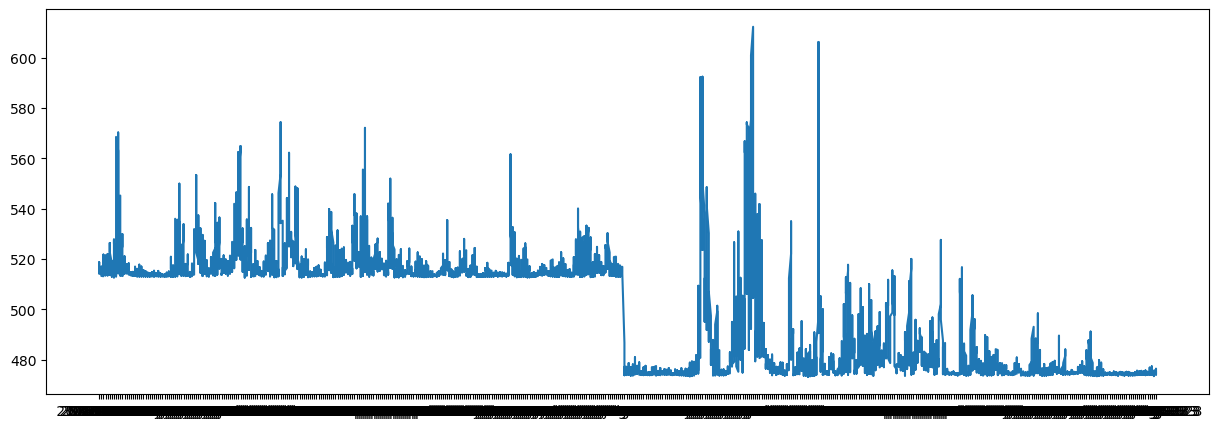

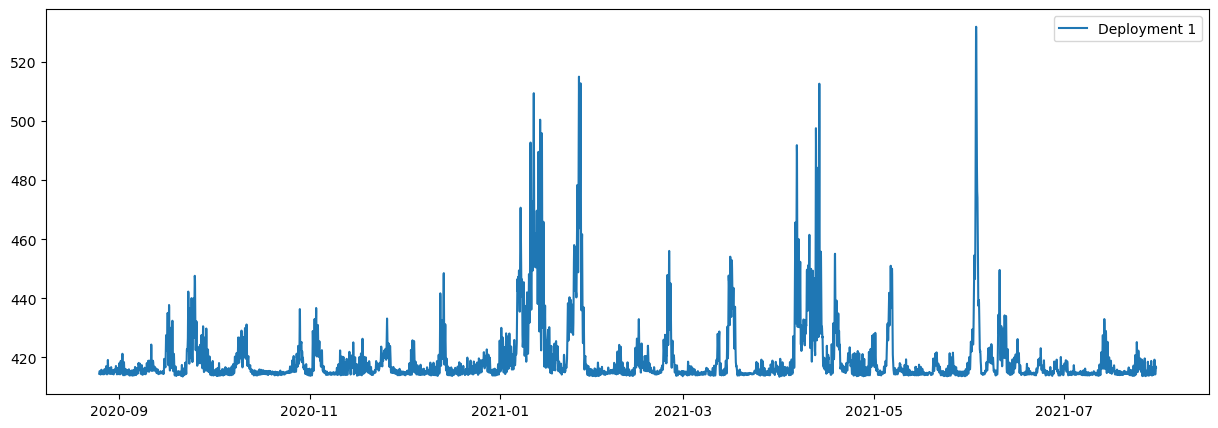

In [7]:
# Vil se om trykkmålingene for 500m er likt for alle utslippningene:
plt.figure(figsize=(15,5))
# Plotter trykkmålingsdataene av god kvalitet til utslippning 2 og 3 som er i combined_df:
combined_df.p_dbar[combined_df.p_qf>=3]=np.nan
plt.plot(combined_df.Date, combined_df.p_dbar)
plt.show()

# Plotter også trykkmålingsdataene av god kvalitet til utslippning 1:
plt.figure(figsize=(15,5))
# Velger y
d1_trykk = d1.PRES[0,:].values[np.where(d1.PRES_QC[0,:]<3)]
plt.plot(d1.PRES[0,:].TIME.values[np.where(d1.PRES_QC[0,:]<3)], d1_trykk, label="Deployment 1")

plt.legend()

In [8]:
print(glob("/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment*/*.nc"))

TypeError: 'module' object is not callable

In [ ]:
deployment1 = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment1/StationM_2021_hydrography.nc'
deployment2_txt_500 = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_500m.txt'
#deployment2_txt_500= '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_1000m.txt'
deployment3_txt_500 = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment3/StaM_SBE_20221125_500m.txt'

In [ ]:
# Siden kolonnene er adskilt med mellomrom og 

names = ['T_raw_degC', 'T_raw_qf', 'T_degC', 'T_qf', 'C_raw_S/m', 
         'C_raw_qf',  'C_S/m', 'C_qf', 'p_raw_dbar', 'p_raw_qf', 
         'p_dbar', 'p_qf', 'S_raw', 'S_raw_q', 'S', 'S_qf', 
         'day', 'month', 'year', 'time']

parse = lambda x: datetime.datetime.strptime(x.replace('Des', 'Dec').replace('Mai', 'May').replace('Okt', 'Oct'), '%d %b %Y %H:%M:%S')


In [ ]:

# Leser inn csv filen: 
# Datafil til Deployment 2 på 500 m:
df_d2_500 = pd.read_csv(deployment2_txt_500, names = names, delim_whitespace=True, header=1, parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)
# Datafil til Deployment 3 på 500 m:
df_d3_500 = pd.read_csv(deployment3_txt_500, names = names, delim_whitespace=True, header=1, parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)



In [ ]:
df_d2_500.S_raw_q

In [ ]:
plt.figure(figsize=(14,7))
#plt.plot(df_d2_500.Datetime, df_d2_500.S)

# Filtrerer slik at dataen som blir brukt er av god kvalitet. 
df_d2_500.S[df_d2_500.S_qf >=3]=np.nan
plt.plot(df_d2_500.Datetime, df_d2_500.S)
df_d3_500.S[df_d3_500.S_qf>=3]=np.nan


In [ ]:
plt.figure(figsize = (10,6))
D1_500 = d1.PSAL[0,:].values[np.where(d1.PSAL_QC[0,:]<3)]
plt.plot(d1.PSAL[0,:].TIME.values[np.where(d1.PSAL_QC[0,:]<3)], D1_500, label="Deployment 1")

plt.plot(df_d2_500.Datetime, df_d2_500.S, label="Deployment 2")
plt.plot(df_d3_500.Datetime, df_d3_500.S, label="Deployment 3")
plt.legend()

In [ ]:
type(df_d3_500.S)

In [ ]:
""""
with xr.open_dataset(deployment1) as ds:
    plt.figure(figsize=(12,6))
    for d in ds.DEPTH.values:
        tmp = d1.sel(DEPTH = d)
        observation_time = tmp.TIME.values[np.where(tmp.PSAL_QC <3)]
        salt = tmp.PSAL.values[np.where(tmp.PSAL_QC <3)]
        
        plt.scatter(observation_time, np.full_like(observation_time,d),c=salt, cmap="viridis", s=10, label = f'{d}m')
        
    cbar = plt.colorbar(label="Salinity")
        
    plt.xlabel("Time")
    plt.ylabel("Depth [m]")
    plt.gca().invert_yaxis()
    plt.legend()
"""
